In [ ]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [124]:
def plot_metrics_by_dataset_sequence(dataset, sequences_to_exclude,label_angle = 0, max_label_length=10, font_size=10, save_path=None):
    # Set font size for the plot
    plt.rcParams.update({'font.size': font_size})
    # Set latex fonts for matplotlib
    matplotlib.rcParams['mathtext.fontset'] = 'cm'
    matplotlib.rcParams['font.family'] = 'STIXGeneral'

    df_path = os.path.join(os.getcwd(),'results',dataset,'image_metrics.csv')
    metrics_df = pd.read_csv(df_path)

    # Exclude specified sequences
    metrics_df = metrics_df[~metrics_df['sequence'].isin(sequences_to_exclude)]
    
    # Sort the DataFrame by 'sequence' in alphabetical order
    metrics_df.sort_values(by='sequence', inplace=True)

    fig_violin = plt.figure()           
    ax_violin = fig_violin.add_subplot(111)  
    columns_to_plot = []   
    columns_to_plot.append('delentropy')

    # Melt the dataframe for seaborn plotting
    melted_df = metrics_df.melt(id_vars=['sequence'], value_vars=columns_to_plot, var_name='metric')

    # Plotting all metrics in one violin plot grouped by sequence
    sns.violinplot(x='sequence', y='value', data=melted_df)
    
    # Crop the x-labels to a maximum number of characters
    ax_violin.set_xticklabels([label.get_text()[:max_label_length] for label in ax_violin.get_xticklabels()])

    
    plt.xticks(rotation=label_angle)
    plt.tight_layout()
    
    # Save the plot if a save path is provided
    if save_path:
        plt.savefig(save_path, format='pdf', bbox_inches='tight')

    plt.show()

def plot_metrics_by_datasets(dataset_list, sequences_to_exclude, label_angle=0, max_label_length=10, font_size=10, save_path=None, y_label_save_path = None):
    # Set font size for the plot
    plt.rcParams.update({'font.size': font_size})
    # Set latex fonts for matplotlib
    matplotlib.rcParams['mathtext.fontset'] = 'cm'
    matplotlib.rcParams['font.family'] = 'STIXGeneral'

    # List to store dataframes from all datasets
    df_list = []

    for dataset in dataset_list:
        df_path = os.path.join(os.getcwd(), 'results', dataset, 'image_metrics.csv')
        try:
            metrics_df = pd.read_csv(df_path)
            # Add a column to identify the dataset
            metrics_df['dataset'] = dataset

            # Exclude specified sequences
            metrics_df = metrics_df[~metrics_df['sequence'].isin(sequences_to_exclude)]

            # Append this dataset's DataFrame to the list
            df_list.append(metrics_df)
        except FileNotFoundError:
            print(f"File not found: {df_path}")
            continue

    # Combine all dataframes in the list
    combined_df = pd.concat(df_list, ignore_index=True)

    # Check if combined_df is empty
    if combined_df.empty:
        print("No data available for plotting.")
        return

    # Sort the DataFrame by 'dataset' in alphabetical order
    combined_df.sort_values(by='dataset', inplace=True)

    fig_violin = plt.figure()           
    ax_violin = fig_violin.add_subplot(111)  
    columns_to_plot = ['delentropy']

    # Melt the dataframe for seaborn plotting
    melted_df = combined_df.melt(id_vars='dataset', value_vars=columns_to_plot, var_name='metric')

    # Plotting metrics in a violin plot for each dataset
    sns.violinplot(x='dataset', y='value', data=melted_df, scale='width')
    
    # Set y-axis limits
    ax_violin.set_ylim(0, 1)
    # Save y-axis label text to a file
    if y_label_save_path:
        with open(y_label_save_path, 'w') as file:
            file.write('Value')

    # Crop the x-labels to a maximum number of characters
    ax_violin.set_xticklabels([label.get_text()[:max_label_length] for label in ax_violin.get_xticklabels()])
    # Remove x-axis tick labels
    ax_violin.set_xticklabels([])
    ax_violin.set_yticklabels([])
    ax_violin.tick_params(axis='y', length=0)

    plt.xticks(rotation=label_angle)
    
    # Remove x and y axis labels
    ax_violin.set_xlabel('')
    ax_violin.set_ylabel('')
    
    # Remove plot borders
    for spine in ax_violin.spines.values():
        spine.set_visible(False)
    
    
    plt.tight_layout()
    
    # Save the plot if a save path is provided
    if save_path:
        plt.savefig(save_path, format='pdf', bbox_inches='tight')
        
    
        
        
    plt.show()
    
def plot_metrics_by_datasets_by_sequences(dataset_list, sequences_to_exclude, label_angle=0, max_label_length=10, font_size=10, save_path=None):
    # Set font size for the plot
    plt.rcParams.update({'font.size': font_size})
    # Set latex fonts for matplotlib
    matplotlib.rcParams['mathtext.fontset'] = 'cm'
    matplotlib.rcParams['font.family'] = 'STIXGeneral'

    # List to store dataframes from all datasets
    df_list = []

    for dataset in dataset_list:
        df_path = os.path.join(os.getcwd(), 'results', dataset, 'image_metrics.csv')
        try:
            metrics_df = pd.read_csv(df_path)
            # Add a column to identify the dataset
            metrics_df['dataset'] = dataset

            # Exclude specified sequences
            metrics_df = metrics_df[~metrics_df['sequence'].isin(sequences_to_exclude)]

            # Append this dataset's DataFrame to the list
            df_list.append(metrics_df)
        except FileNotFoundError:
            print(f"File not found: {df_path}")
            continue

    # Combine all dataframes in the list
    combined_df = pd.concat(df_list, ignore_index=True)

    # Check if combined_df is empty
    if combined_df.empty:
        print("No data available for plotting.")
        return

    # Sort the DataFrame by 'dataset' and then 'sequence' in alphabetical order
    combined_df.sort_values(by=['dataset', 'sequence'], inplace=True)

    fig_violin = plt.figure()           
    ax_violin = fig_violin.add_subplot(111)  
    columns_to_plot = ['delentropy']

    # Melt the dataframe for seaborn plotting
    melted_df = combined_df.melt(id_vars=['dataset', 'sequence'], value_vars=columns_to_plot, var_name='metric')

    # Plotting all metrics in one violin plot grouped by dataset and sequence
    sns.violinplot(x='dataset', y='value', hue='sequence', data=melted_df, scale='width')

    # Crop the x-labels to a maximum number of characters
    ax_violin.set_xticklabels([label.get_text()[:max_label_length] for label in ax_violin.get_xticklabels()])

    plt.xticks(rotation=label_angle)
    plt.tight_layout()
    
    # Save the plot if a save path is provided
    if save_path:
        plt.savefig(save_path, format='pdf', bbox_inches='tight')
        
    plt.show()

# All together

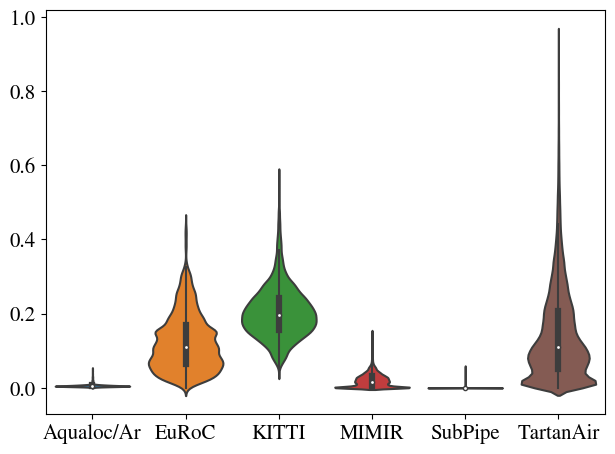

In [102]:
dataset_list = ['Aqualoc/Archaeological_site_sequences', 'EuRoC', 'KITTI','MIMIR','TartanAir','SubPipe']
sequences_to_exclude = [None]
plot_metrics_by_datasets(dataset_list, sequences_to_exclude, font_size=15)

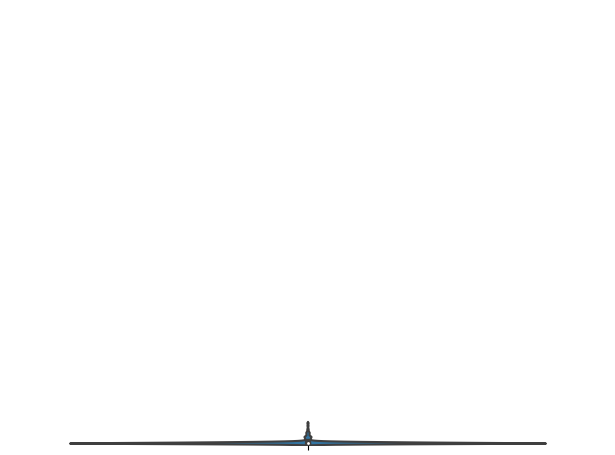

In [130]:
dataset_list = ['Aqualoc/Archaeological_site_sequences']
sequences_to_exclude = ['None']
save_path = os.path.join(os.getcwd(),'delentropy.pdf')
y_label_save_path = os.path.join(os.getcwd(),'label.pdf')
plot_metrics_by_datasets(dataset_list, sequences_to_exclude, font_size=15,save_path =save_path, y_label_save_path = y_label_save_path)

# All together but split by sequence

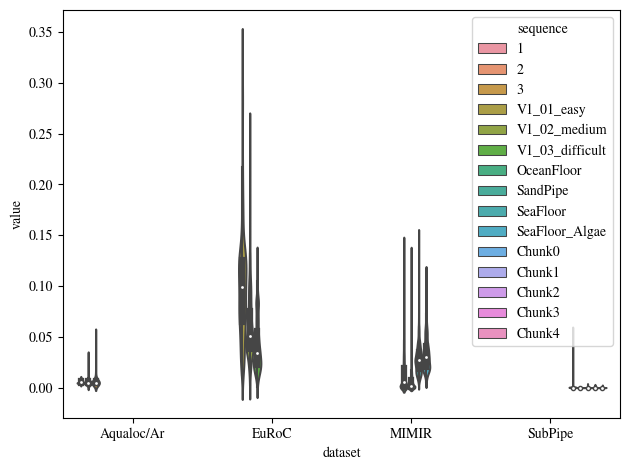

In [89]:
dataset_list = ['Aqualoc/Archaeological_site_sequences', 'EuRoC', 'MIMIR','SubPipe']
sequences_to_exclude = ['MH_01_easy','MH_02_easy','MH_03_medium','MH_04_difficult','MH_05_difficult',
                         'V2_01_easy','V2_02_medium','V2_03_difficult','0','4','5','6','7','8','9','10']
plot_metrics_by_datasets_by_sequences(dataset_list, sequences_to_exclude)

# Metrics for each dataset

## Aqualoc

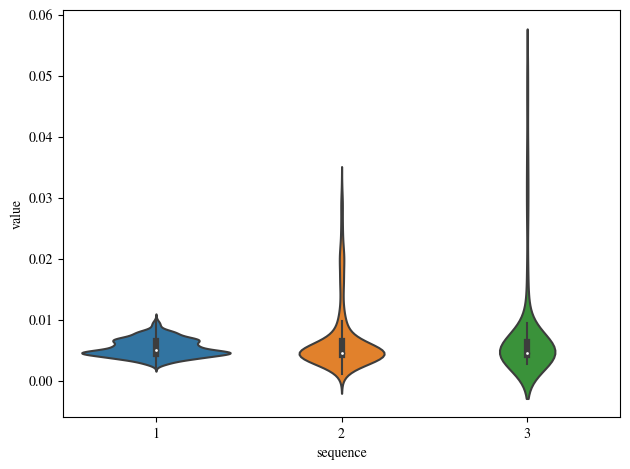

In [47]:
plot_metrics_by_dataset_sequence('Aqualoc/Archaeological_site_sequences',[None])

## EuRoC

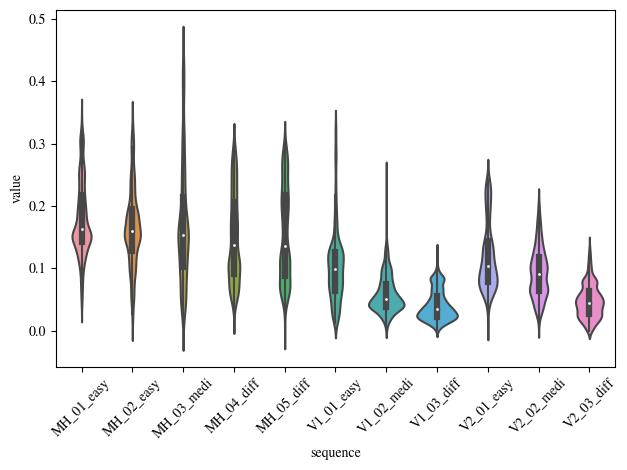

In [49]:
plot_metrics_by_dataset_sequence('EuRoC',[None],label_angle = 45, max_label_length=10)

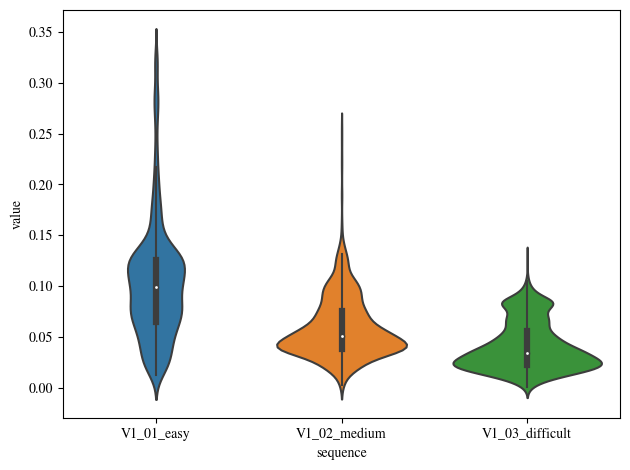

In [50]:
# ['MH_01_easy','MH_02_easy','MH_03_medium','MH_04_difficult','MH_05_difficult',
#                          'V1_01_easy', 'V1_02_medium', 'V1_03_difficult',
#                          'V2_01_easy','V2_02_medium','V2_03_difficult'],
plot_metrics_by_dataset_sequence('EuRoC',
                        ['MH_01_easy','MH_02_easy','MH_03_medium','MH_04_difficult','MH_05_difficult',
                         'V2_01_easy','V2_02_medium','V2_03_difficult'],
                        max_label_length=15)

## KITTI

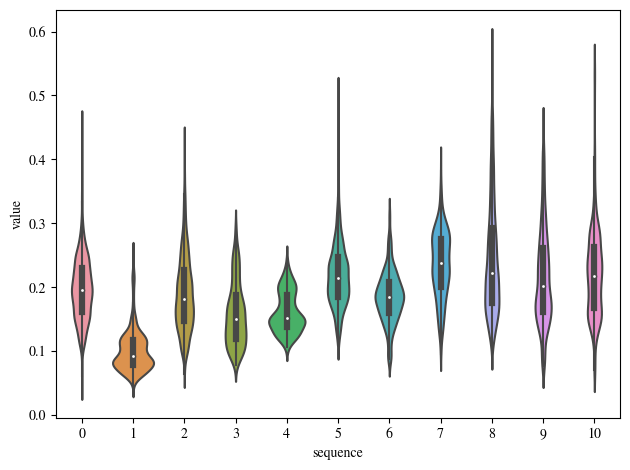

In [51]:
plot_metrics_by_dataset_sequence('KITTI',[None])

## MIMIR

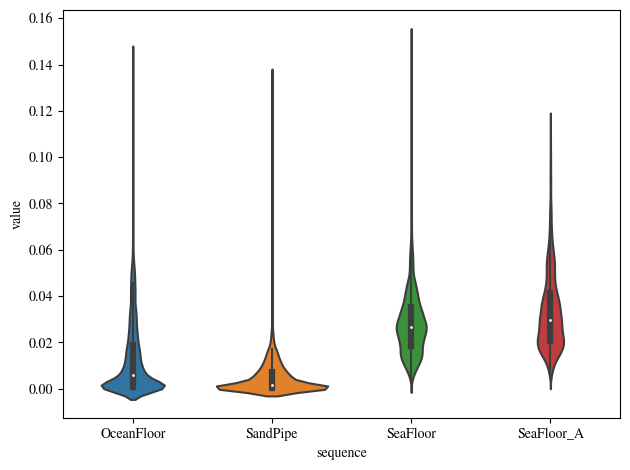

In [52]:
plot_metrics_by_dataset_sequence('MIMIR',[None])

## SubPipe

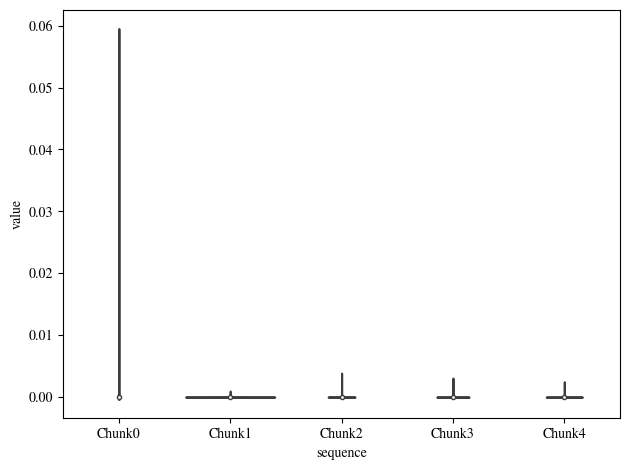

In [54]:
plot_metrics_by_dataset_sequence('SubPipe',[None])

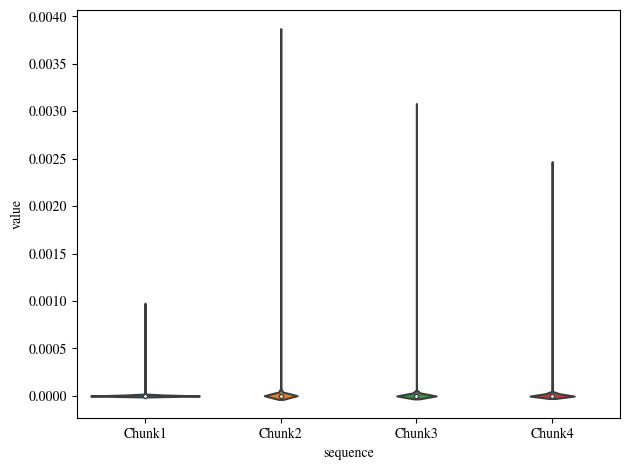

In [55]:
plot_metrics_by_dataset_sequence('SubPipe',['Chunk0'])